### Testing of the code during development

Looking at the M1-1 dataset

In [1]:
import os
import glob
from oyv.imports import *
import importlib

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [2]:
%matplotlib inline

In [3]:
# Load the modules
os.chdir('../../')
from sigpyproc import sig_funcs, sig_append_external
os.chdir('testing/development/')

In [4]:
# Load converted data from M1-1
floc = '/media/oyvindl/ratatosk/data/mooring_data/signature500/m1_1/converted/*'
flist = glob.glob(floc)
for fn in flist:
    if '_avgd' in fn:
        flist.remove(fn)

In [49]:
# RELOAD the sig_func module
#os.chdir('../../')
importlib.reload(sig_funcs)
#os.chdir('testing/development/')

<module 'sigpyproc.sig_funcs' from '/home/oyvindl/work/code/git_public/sigpyproc/sigpyproc/sig_funcs.py'>

## # CURRENTLY KILLED AT DX.sortby() !


In [124]:

DX = sig_funcs.matfiles_to_dataset(flist, )

/home/oyvindl/work/code/git_public/sigpyproc/sigpyproc/sig_funcs.py:513: RuntimeWarning: invalid value encountered in sqrt
  try:
/home/oyvindl/work/code/git_public/sigpyproc/sigpyproc/sig_funcs.py:522: RuntimeWarning: invalid value encountered in sqrt
  try:


1870992 time points, 38979 ensembles. Sample per ensemble: 48
Done. Run sig_funcs.overview() to print some additional details.


In [126]:
DX.ICE_IN_SAMPLE

<xarray.DataArray 'ICE_IN_SAMPLE' (TIME: 38979, SAMPLE: 48)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * TIME     (TIME) float64 1.781e+04 1.781e+04 ... 1.822e+04 1.822e+04
  * SAMPLE   (SAMPLE) int64 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48
Attributes:
    long_name:  Identification of sea ice in sample (conservative estimate)
    desc:       Binary classification (ice/not ice), where "ice" is when FOM ...

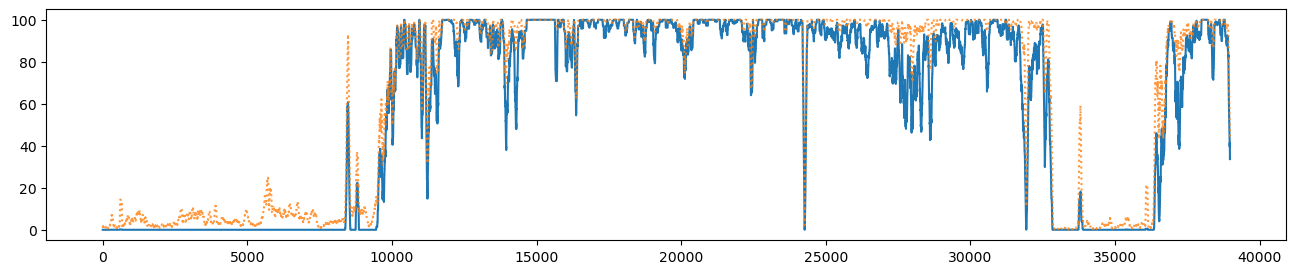

In [127]:
fig, ax = plt.subplots(figsize = (16, 3))
ax.plot(rs(DX.SIC_FOM, 71).mean)
ax.plot(rs(DX.SIC_FOM_ALT, 71).mean, ':', alpha = 0.8)

In [129]:
DX.SIC_FOM

<xarray.DataArray 'SIC_FOM' (TIME: 38979)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * TIME     (TIME) float64 1.781e+04 1.781e+04 ... 1.822e+04 1.822e+04
Attributes:
    long_name:  Sea ice concentration
    desc:       "Sea ice concentration" in each ensemble based on FOM criteri...
    units:      %
    note:       Typically most useful when averaged over a longer period (e.g...

In [114]:
DX.SIC_FOM_ALT

<xarray.DataArray 'SIC_FOM_ALT' (TIME: 38979)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * TIME     (TIME) float64 1.781e+04 1.781e+04 ... 1.822e+04 1.822e+04
Attributes:
    long_name:  Sea ice concentration (alternative)
    desc:       "Sea ice concentration" in each ensemble based on FOM criteri...
    units:      %
    note:       *SIC_FOM_ALT* seems a bit "trigger happy" - recommended to us...

In [ ]:
DX.sampling_interval_sec

In [ ]:
DX.Plan_ProfileInterval/60

In [ ]:
## Print some stuff with the overview() function
sig_funcs.overview(DX)

In [ ]:
fig, ax = plt.subplots()
ax.plot(DX.Average_AltimeterPressure[:, 0])
ax.plot(DX.Average_Pressure[:, 0])
ax.set_ylim()

In [ ]:
DX.A

In [ ]:
fig, ax = plt.subplots()
ax.plot(DX.Average_AltimeterPressure[:, 0]-DX.Average_Pressure[:, 0])

In [ ]:
DX.attrs

In [ ]:
ca()

In [ ]:
DX.Average_AltimeterDistanceAST

In [ ]:
nn = int(np.random.rand()*DX.dims['TIME'])
print(nn)
fig, ax = plt.subplots()
ax.plot(DX.Average_AltimeterDistanceAST[nn, :])

In [ ]:
fig, ax = plt.subplots()
ax.hist(DX.Average_AltimeterQualityAST.to_numpy().flatten(), 100)

In [ ]:
DX

### Check that the time looks reasonable

In [ ]:
DX.dims['TIME']

In [ ]:
fig, ax = plt.subplots()
ax.plot(DX['TIME'])

In [ ]:
from matplotlib.dates import num2date 

In [ ]:
def overview(DX):
    '''
    Prints some basic information about the dataset.
    '''

    # Time range
    datefmt = '%d %b %Y %H:%M'
    starttime = num2date(DX.TIME[0]).strftime(datefmt)
    endtime = num2date(DX.TIME[-1]).strftime(datefmt)
    ndays = DX.TIME[-1]-DX.TIME[0]

    print('\nTIME RANGE:\n%s  -->  %s  (%.1f days)'%(
        starttime, endtime, ndays))

    # Size
    print('\nSIZE:\nTotal %i time points.'%(DX.dims['TIME']*DX.dims['SAMPLE']))
    print('Split into %i ensembles with %i sample per ensemble.'%(
          DX.dims['TIME'], DX.dims['SAMPLE']))
    print('Ocean velocity bins: %i.'%(DX.dims['bins']))

In [ ]:
#### Have a look at the altimeter record

In [ ]:
DX.caonf

In [ ]:
overview(DX)

In [ ]:
num2date(DX.TIME[0])

In [ ]:
DX = sig_funcs.matfiles_to_dataset(flist, reshape = False)

In [ ]:
DXX = sig_funcs.reshape_ensembles(DX)

In [ ]:
os.chdir('../testing/basic_test/')

In [ ]:
ls

In [ ]:
DX

In [ ]:
mean_FOM = DX[nm].mean(axis = 1)


In [ ]:
sl = slice(None, None, 100)
fig, ax = plt.subplots(4, 1, sharex = True, sharey = True)
for nn in np.arange(1, 5):
    nm = 'AverageIce_FOMBeam%i'%nn
    mean_FOM = DX[nm].mean(axis = 1)
    ax[nn-1].hist(mean_FOM/ mean_FOM.max(), 25, alpha = 0.8, )

In [ ]:
sl = slice(None, None, 100)
fig, ax = plt.subplots()
for nn in np.arange(1, 5):
    nm = 'AverageIce_FOMBeam%i'%nn
    ax.plot(DX[nm].to_numpy().flatten()[sl]/ DX[nm].to_numpy().flatten()[sl].max()+(nn-1)*1.1, 'o', alpha = 0.1)

In [ ]:
sl = slice(10000, 10100)
fig, ax = plt.subplots()
ax.hist(DX.AverageIce_FOMBeam1.to_numpy().flatten(), 1000)

In [ ]:
ice_class_FOM(DX, threshold = 500)

In [ ]:
sl = slice(10000, 10100)
fig, ax = plt.subplots()
ax.plot(DX.to_array())

In [ ]:
def ice_class_from_FOM(DX, FOM_thr = 300)